In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import seaborn as sns

In [2]:
df = pd.read_csv('../database.csv')

In [3]:
df.head()

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650


In [4]:
df.shape

(2795, 48)

In [5]:
df.columns

Index(['Report Number', 'Supplemental Number', 'Accident Year',
       'Accident Date/Time', 'Operator ID', 'Operator Name',
       'Pipeline/Facility Name', 'Pipeline Location', 'Pipeline Type',
       'Liquid Type', 'Liquid Subtype', 'Liquid Name', 'Accident City',
       'Accident County', 'Accident State', 'Accident Latitude',
       'Accident Longitude', 'Cause Category', 'Cause Subcategory',
       'Unintentional Release (Barrels)', 'Intentional Release (Barrels)',
       'Liquid Recovery (Barrels)', 'Net Loss (Barrels)', 'Liquid Ignition',
       'Liquid Explosion', 'Pipeline Shutdown', 'Shutdown Date/Time',
       'Restart Date/Time', 'Public Evacuations', 'Operator Employee Injuries',
       'Operator Contractor Injuries', 'Emergency Responder Injuries',
       'Other Injuries', 'Public Injuries', 'All Injuries',
       'Operator Employee Fatalities', 'Operator Contractor Fatalities',
       'Emergency Responder Fatalities', 'Other Fatalities',
       'Public Fatalities', 'All

In [6]:
df.nunique()

Report Number                           2795
Supplemental Number                     2795
Accident Year                              8
Accident Date/Time                      2777
Operator ID                              213
Operator Name                            229
Pipeline/Facility Name                  1977
Pipeline Location                          2
Pipeline Type                              4
Liquid Type                                5
Liquid Subtype                             8
Liquid Name                               69
Accident City                           1027
Accident County                          678
Accident State                            46
Accident Latitude                       2552
Accident Longitude                      2557
Cause Category                             7
Cause Subcategory                         38
Unintentional Release (Barrels)          697
Intentional Release (Barrels)            117
Liquid Recovery (Barrels)                539
Net Loss (

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 48 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Report Number                         2795 non-null   int64  
 1   Supplemental Number                   2795 non-null   int64  
 2   Accident Year                         2795 non-null   int64  
 3   Accident Date/Time                    2795 non-null   object 
 4   Operator ID                           2795 non-null   int64  
 5   Operator Name                         2795 non-null   object 
 6   Pipeline/Facility Name                2674 non-null   object 
 7   Pipeline Location                     2795 non-null   object 
 8   Pipeline Type                         2777 non-null   object 
 9   Liquid Type                           2795 non-null   object 
 10  Liquid Subtype                        1349 non-null   object 
 11  Liquid Name      

In [8]:
df.drop(columns=['Report Number','Supplemental Number','Operator ID','All Injuries'],inplace=True)

In [9]:
df.shape

(2795, 44)

In [10]:
df.columns

Index(['Accident Year', 'Accident Date/Time', 'Operator Name',
       'Pipeline/Facility Name', 'Pipeline Location', 'Pipeline Type',
       'Liquid Type', 'Liquid Subtype', 'Liquid Name', 'Accident City',
       'Accident County', 'Accident State', 'Accident Latitude',
       'Accident Longitude', 'Cause Category', 'Cause Subcategory',
       'Unintentional Release (Barrels)', 'Intentional Release (Barrels)',
       'Liquid Recovery (Barrels)', 'Net Loss (Barrels)', 'Liquid Ignition',
       'Liquid Explosion', 'Pipeline Shutdown', 'Shutdown Date/Time',
       'Restart Date/Time', 'Public Evacuations', 'Operator Employee Injuries',
       'Operator Contractor Injuries', 'Emergency Responder Injuries',
       'Other Injuries', 'Public Injuries', 'Operator Employee Fatalities',
       'Operator Contractor Fatalities', 'Emergency Responder Fatalities',
       'Other Fatalities', 'Public Fatalities', 'All Fatalities',
       'Property Damage Costs', 'Lost Commodity Costs',
       'Public/

In [11]:
df.dtypes

Accident Year                             int64
Accident Date/Time                       object
Operator Name                            object
Pipeline/Facility Name                   object
Pipeline Location                        object
Pipeline Type                            object
Liquid Type                              object
Liquid Subtype                           object
Liquid Name                              object
Accident City                            object
Accident County                          object
Accident State                           object
Accident Latitude                       float64
Accident Longitude                      float64
Cause Category                           object
Cause Subcategory                        object
Unintentional Release (Barrels)         float64
Intentional Release (Barrels)           float64
Liquid Recovery (Barrels)               float64
Net Loss (Barrels)                      float64
Liquid Ignition                         

In [12]:
df['Cause Category'].unique()

array(['INCORRECT OPERATION', 'MATERIAL/WELD/EQUIP FAILURE',
       'NATURAL FORCE DAMAGE', 'EXCAVATION DAMAGE', 'ALL OTHER CAUSES',
       'CORROSION', 'OTHER OUTSIDE FORCE DAMAGE'], dtype=object)

In [13]:
causes = df['Cause Category'].value_counts()
causes = go.Bar(
   y = causes.values, 
   x = causes.index.values, 
   name = 'Causes Category Count', 
     marker=dict(
        color=causes.values,
        colorscale = 'Viridis',
        reversescale = True
        )
)

data = [causes]

layout = go.Layout (
title = 'Cause category', 
width = 700, 
margin=go.Margin(b=140, r=150)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='basic-bar')

C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\plotly\graph_objs\_deprecations.py:405: DeprecationWarning:

plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin




In [14]:
df['Cause Subcategory'].unique()

array(['PIPELINE/EQUIPMENT OVERPRESSURED',
       'PUMP OR PUMP-RELATED EQUIPMENT',
       'DEFECTIVE OR LOOSE TUBING/FITTING', 'TEMPERATURE',
       'THIRD PARTY EXCAVATION DAMAGE', 'MANUFACTURING-RELATED',
       'ENVIRONMENTAL CRACKING-RELATED', 'OTHER EQUIPMENT FAILURE',
       'MISCELLANEOUS',
       'CONSTRUCTION, INSTALLATION OR FABRICATION-RELATED', 'INTERNAL',
       'INCORRECT INSTALLATION', 'OVERFILL/OVERFLOW OF TANK/VESSEL/SUMP',
       'VEHICLE NOT ENGAGED IN EXCAVATION',
       'THREADED CONNECTION/COUPLING FAILURE',
       'NON-THREADED CONNECTION FAILURE', 'FAILURE OF EQUIPMENT BODY',
       'EXTERNAL', 'INCORRECT VALVE POSITION',
       'OTHER NATURAL FORCE DAMAGE',
       'MALFUNCTION OF CONTROL/RELIEF EQUIPMENT',
       'OTHER OUTSIDE FORCE DAMAGE', 'OTHER INCORRECT OPERATION',
       'EARTH MOVEMENT', 'PREVIOUS DAMAGE DUE TO EXCAVATION',
       'HEAVY RAINS/FLOODS',
       'ELECTRICAL ARCING FROM OTHER EQUIPMENT/FACILITY', 'LIGHTNING',
       'OPERATOR/CONTRACTOR EX

In [22]:
causes_sub = df['Cause Subcategory'].value_counts()
causes_sub = go.Bar(
   y = causes_sub.values, 
   x = causes_sub.index.values, 
   name = 'Causes Subcategory Count', 
     marker=dict(
        color=causes_sub.values,
        colorscale = 'Viridis',
        reversescale = True
        )    
)
data = [causes_sub]

layout = go.Layout (
title = 'Cause Subcategory', 
height = 800,
width = 800, 
margin=go.Margin(b=100, r=80)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='basic-bar')

In [38]:
df['Net Loss (Barrels)'].nunique()

443

In [43]:
df['All Costs'].nunique()

2279

Text(0.005, 100000000.0, 'All Costs')

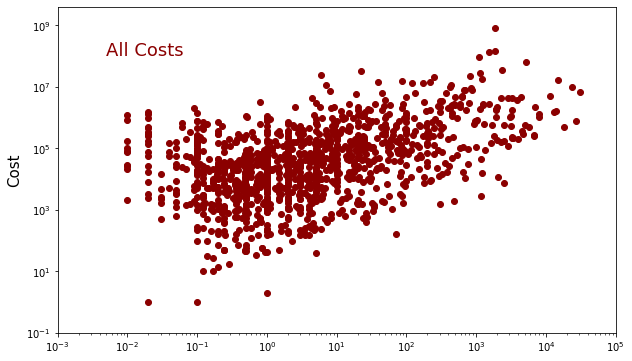

In [41]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Net Loss (Barrels)'].values,
              df['All Costs'].values, 
              label="All", color='darkred')
ax.set_yscale('log')
ax.set_ylim(0.1,4e9)
ax.set_xscale('log')
ax.set_xlim(0.001,100000)
ax.set_ylabel('Cost', fontsize=15)
ax.text(0.005, 1e8, "All Costs", fontsize=18, color='darkred')


In [44]:
df['Environmental Remediation Costs'].nunique()

628

Text(0.005, 100000000.0, 'Environmental Costs')

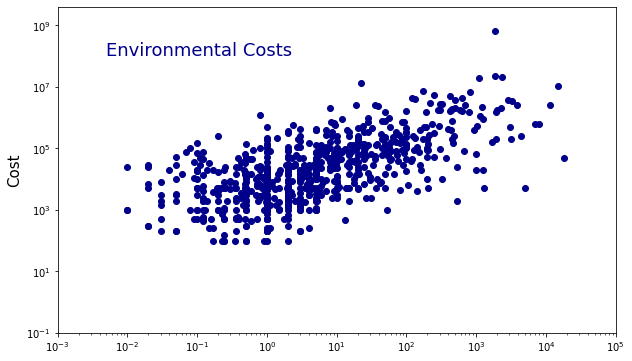

In [42]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Net Loss (Barrels)'].values,
              df['Environmental Remediation Costs'].values, 
              label="All", color='darkblue')
ax.set_yscale('log')
ax.set_ylim(0.1,4e9)
ax.set_xscale('log')
ax.set_xlim(0.001,100000)
ax.set_ylabel('Cost', fontsize=15)
ax.text(0.005, 1e8, "Environmental Costs", fontsize=18, color='darkblue')


In [45]:
df['Emergency Response Costs'].nunique()

712

Text(0.005, 100000000.0, 'Emergency Costs')

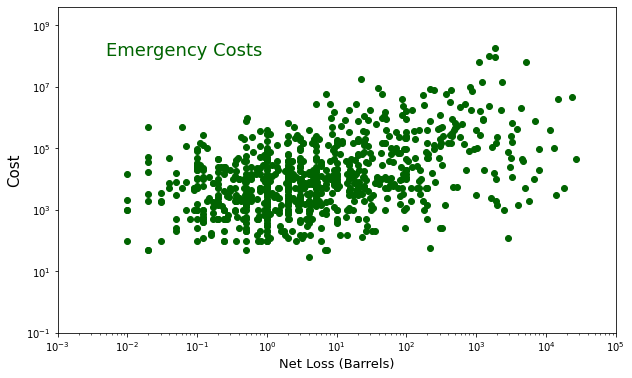

In [46]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Net Loss (Barrels)'].values,
              df['Emergency Response Costs'].values, 
              label="All", color='darkgreen')
ax.set_yscale('log')
ax.set_ylim(0.1,4e9)
ax.set_xscale('log')
ax.set_xlim(0.001,100000)
ax.set_ylabel('Cost', fontsize=15)
ax.set_xlabel('Net Loss (Barrels)', fontsize=13)
ax.text(0.005, 1e8, "Emergency Costs", fontsize=18, color='darkgreen')